<a href="https://colab.research.google.com/github/CatalinaOrtegha/2ndChallenge_TelecomX/blob/main/2ndChallenge_TelecomX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#📌 Extracción




In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
url='https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json'

data_telecom=pd.read_json(url)
data_telecom.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


#🔧 Transformación

In [4]:
data_telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [5]:
df = pd.json_normalize(data_telecom.to_dict(orient='records'), meta=['customerID', 'Churn'], sep='_')
df.head()

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [6]:
df.columns = df.columns.str.lower()
df

,customerid,churn,customer_gender,customer_seniorcitizen,customer_partner,customer_dependents,customer_tenure,phone_phoneservice,phone_multiplelines,internet_internetservice,...,internet_onlinebackup,internet_deviceprotection,internet_techsupport,internet_streamingtv,internet_streamingmovies,account_contract,account_paperlessbilling,account_paymentmethod,account_charges_monthly,account_charges_total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [7]:
columnas=df.columns
columnas

Index(['customerid', 'churn', 'customer_gender', 'customer_seniorcitizen',
       'customer_partner', 'customer_dependents', 'customer_tenure',
       'phone_phoneservice', 'phone_multiplelines', 'internet_internetservice',
       'internet_onlinesecurity', 'internet_onlinebackup',
       'internet_deviceprotection', 'internet_techsupport',
       'internet_streamingtv', 'internet_streamingmovies', 'account_contract',
       'account_paperlessbilling', 'account_paymentmethod',
       'account_charges_monthly', 'account_charges_total'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerid                 7267 non-null   object 
 1   churn                      7267 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_seniorcitizen     7267 non-null   int64  
 4   customer_partner           7267 non-null   object 
 5   customer_dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_phoneservice         7267 non-null   object 
 8   phone_multiplelines        7267 non-null   object 
 9   internet_internetservice   7267 non-null   object 
 10  internet_onlinesecurity    7267 non-null   object 
 11  internet_onlinebackup      7267 non-null   object 
 12  internet_deviceprotection  7267 non-null   object 
 13  internet_techsupport       7267 non-null   objec

In [9]:
df[columnas[:10]]

,customerid,churn,customer_gender,customer_seniorcitizen,customer_partner,customer_dependents,customer_tenure,phone_phoneservice,phone_multiplelines,internet_internetservice
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic
...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL


In [10]:
df[columnas[:10]].tail(15)

,customerid,churn,customer_gender,customer_seniorcitizen,customer_partner,customer_dependents,customer_tenure,phone_phoneservice,phone_multiplelines,internet_internetservice
7252,9972-EWRJS,No,Female,0,Yes,Yes,67,Yes,No,No
7253,9972-NKTFD,No,Female,0,No,No,28,Yes,No,DSL
7254,9972-VAFJJ,No,Female,1,Yes,No,53,Yes,No,Fiber optic
7255,9974-JFBHQ,No,Male,0,No,Yes,64,Yes,No,Fiber optic
7256,9975-GPKZU,No,Male,0,Yes,Yes,46,Yes,No,No
7257,9975-SKRNR,No,Male,0,No,No,1,Yes,No,No
7258,9978-HYCIN,No,Male,1,Yes,Yes,47,Yes,No,Fiber optic
7259,9979-RGMZT,No,Female,0,No,No,7,Yes,No,Fiber optic
7260,9985-MWVIX,Yes,Female,0,No,No,1,Yes,No,Fiber optic
7261,9986-BONCE,Yes,Female,0,No,No,4,Yes,No,No


In [11]:
df[columnas[10:]]

,internet_onlinesecurity,internet_onlinebackup,internet_deviceprotection,internet_techsupport,internet_streamingtv,internet_streamingmovies,account_contract,account_paperlessbilling,account_paymentmethod,account_charges_monthly,account_charges_total
0,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...
7262,Yes,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,No,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,Yes,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [12]:
df[columnas[10:]].tail(15)

,internet_onlinesecurity,internet_onlinebackup,internet_deviceprotection,internet_techsupport,internet_streamingtv,internet_streamingmovies,account_contract,account_paperlessbilling,account_paymentmethod,account_charges_monthly,account_charges_total
7252,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),19.25,1372.9
7253,No,Yes,No,Yes,No,No,Month-to-month,No,Bank transfer (automatic),54.65,1517.5
7254,No,Yes,Yes,Yes,Yes,No,One year,Yes,Electronic check,94.00,4871.45
7255,No,Yes,No,Yes,Yes,Yes,Month-to-month,Yes,Credit card (automatic),99.15,6171.2
7256,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),19.75,856.5
7257,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,18.90,18.9
7258,No,Yes,No,No,Yes,No,One year,Yes,Bank transfer (automatic),84.95,4018.05
7259,No,Yes,No,No,Yes,Yes,One year,Yes,Mailed check,94.05,633.45
7260,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,70.15,70.15
7261,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Bank transfer (automatic),20.95,85.5


In [13]:
df[columnas].apply(pd.Series.unique)

,0
customerid,"[0002-ORFBO, 0003-MKNFE, 0004-TLHLJ, 0011-IGKF..."
churn,"[No, Yes, ]"
customer_gender,"[Female, Male]"
customer_seniorcitizen,"[0, 1]"
customer_partner,"[Yes, No]"
customer_dependents,"[Yes, No]"
customer_tenure,"[9, 4, 13, 3, 71, 63, 7, 65, 54, 72, 5, 56, 34..."
phone_phoneservice,"[Yes, No]"
phone_multiplelines,"[No, Yes, No phone service]"
internet_internetservice,"[DSL, Fiber optic, No]"


In [14]:
df['churn'].unique()

array(['No', 'Yes', ''], dtype=object)

In [15]:
df['customer_seniorcitizen'].unique()

array([0, 1])

In [16]:
df['phone_multiplelines'].unique()

array(['No', 'Yes', 'No phone service'], dtype=object)

In [17]:
df['internet_onlinesecurity'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [18]:
df['internet_onlinebackup'].unique()

array(['Yes', 'No', 'No internet service'], dtype=object)

In [19]:
df['internet_deviceprotection'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [20]:
df['internet_techsupport'].unique()

array(['Yes', 'No', 'No internet service'], dtype=object)

In [21]:
df['internet_streamingtv'].unique()

array(['Yes', 'No', 'No internet service'], dtype=object)

In [22]:
df['internet_streamingmovies'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [23]:
df['customerid'].duplicated().any()

np.False_

In [24]:
df['customerid']=df['customerid'].str.replace(r'\D', '', regex=True).str.strip()
df['customerid'].head()

,customerid
0,0002
1,0003
2,0004
3,0011
4,0013


In [25]:
df['account_charges_total'] = df['account_charges_total'].replace(' ', np.nan)
df['account_charges_total']=df['account_charges_total'].astype(np.float64)

In [26]:
df.isnull().any()

,0
customerid,False
churn,False
customer_gender,False
customer_seniorcitizen,False
customer_partner,False
customer_dependents,False
customer_tenure,False
phone_phoneservice,False
phone_multiplelines,False
internet_internetservice,False


In [27]:
mascara=df['account_charges_total'].isnull()
df[mascara]

,customerid,churn,customer_gender,customer_seniorcitizen,customer_partner,customer_dependents,customer_tenure,phone_phoneservice,phone_multiplelines,internet_internetservice,...,internet_onlinebackup,internet_deviceprotection,internet_techsupport,internet_streamingtv,internet_streamingmovies,account_contract,account_paperlessbilling,account_paymentmethod,account_charges_monthly,account_charges_total
975,1371,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN
1775,2520,No,Female,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN
1955,2775,No,Male,0,No,Yes,0,Yes,Yes,DSL,...,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,NaN
2075,2923,No,Male,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN
2232,3115,No,Male,0,No,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN
2308,3213,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN
2930,4075,No,Female,0,Yes,Yes,0,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN
3134,4367,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN
3203,4472,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN
4169,5709,No,Female,0,Yes,Yes,0,Yes,No,DSL,...,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN


In [28]:
df.iloc[975,20]=(df.iloc[975,19]*24).round(2)
df.iloc[975,20]

np.float64(1345.2)

In [63]:
meses = df['account_contract'].map({'Two year': 24, 'One year': 12})

df['account_charges_total'] = df['account_charges_total'].fillna(
    (df['account_charges_monthly'] * meses).round(2)
)


In [64]:
mascara=df['account_charges_total'].isnull()
df[mascara]

,customerid,churn,customer_gender,customer_seniorcitizen,customer_partner,customer_dependents,customer_tenure,phone_phoneservice,phone_multiplelines,internet_internetservice,...,internet_deviceprotection,internet_techsupport,internet_streamingtv,internet_streamingmovies,account_contract,account_paperlessbilling,account_paymentmethod,account_charges_monthly,account_charges_total,daily_accounts


In [31]:
filas_nan_charges_total = [975, 1775, 1955, 2075, 2232, 2308, 2930, 3134, 3203, 4169, 5599]
df.iloc[filas_nan_charges_total,20]

,account_charges_total
975,1345.2
1775,480.0
1955,1485.6
2075,236.4
2232,486.0
2308,608.4
2930,1760.4
3134,618.0
3203,1261.2
4169,1940.4


In [32]:
df['churn'] = df['churn'].replace(' ', np.nan)
df['churn']=df['churn'].astype(np.bool)

In [33]:
df['churn'].isin(['NaN']).any()

np.False_

In [34]:
df['churn']

,churn
0,True
1,True
2,True
3,True
4,True
...,...
7262,True
7263,True
7264,True
7265,True


In [35]:
df[columnas].isin(['No internet service','No phone service']).any()

,0
customerid,False
churn,False
customer_gender,False
customer_seniorcitizen,False
customer_partner,False
customer_dependents,False
customer_tenure,False
phone_phoneservice,False
phone_multiplelines,True
internet_internetservice,False


In [36]:
df.loc[7266, 'phone_multiplelines']

'No phone service'

In [37]:
columnas_noservice=[columnas[8]] + columnas[10:17].tolist()
columnas_noservice

['phone_multiplelines',
 'internet_onlinesecurity',
 'internet_onlinebackup',
 'internet_deviceprotection',
 'internet_techsupport',
 'internet_streamingtv',
 'internet_streamingmovies',
 'account_contract']

In [38]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [39]:
df[columnas_noservice]=df[columnas_noservice].applymap(lambda x : x.replace('No internet service','No').replace('No phone service','No').strip())
df[columnas_noservice].head(15)

,phone_multiplelines,internet_onlinesecurity,internet_onlinebackup,internet_deviceprotection,internet_techsupport,internet_streamingtv,internet_streamingmovies,account_contract
0,No,No,Yes,No,Yes,Yes,No,One year
1,Yes,No,No,No,No,No,Yes,Month-to-month
2,No,No,No,Yes,No,No,No,Month-to-month
3,No,No,Yes,Yes,No,Yes,Yes,Month-to-month
4,No,No,No,No,Yes,Yes,No,Month-to-month
5,No,No,No,No,Yes,Yes,Yes,Month-to-month
6,No,Yes,Yes,Yes,Yes,Yes,Yes,Two year
7,Yes,Yes,No,No,Yes,No,No,Two year
8,No,Yes,No,No,No,No,No,Month-to-month
9,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Two year


In [40]:
#Sugerencia para evitar el enunciado de desaprobado

# Correctly define the list of column names that need to be processed.
# Based on earlier analysis (cell 77AfO4Vp4pEl), these columns contained 'No internet service' or 'No phone service'.
# 'account_Contract' is excluded as it did not contain these values.
#columns_to_process = [columnas[8]] + columnas[10:16].to_list()

# Iterate through the identified columns and apply the replacements directly.
#for col in columns_to_process:
    #df[col] = df[col].apply(lambda x : x.replace('No internet service','No').replace('No phone service','No').strip())
#df[columns_to_process].head(15)

In [41]:
df[columnas].isin(['Yes', 'No']).any()

,0
customerid,False
churn,False
customer_gender,False
customer_seniorcitizen,False
customer_partner,True
customer_dependents,True
customer_tenure,False
phone_phoneservice,True
phone_multiplelines,True
internet_internetservice,True


In [42]:
columnasbool = [columnas[1]] + columnas[3:6].tolist() + columnas[7:9].tolist()+columnas[10:16].tolist()+[columnas[17]]
columnasbool

['churn',
 'customer_seniorcitizen',
 'customer_partner',
 'customer_dependents',
 'phone_phoneservice',
 'phone_multiplelines',
 'internet_onlinesecurity',
 'internet_onlinebackup',
 'internet_deviceprotection',
 'internet_techsupport',
 'internet_streamingtv',
 'internet_streamingmovies',
 'account_paperlessbilling']

In [43]:
df[columnasbool]=df[columnasbool].astype(np.bool)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerid                 7267 non-null   object 
 1   churn                      7267 non-null   bool   
 2   customer_gender            7267 non-null   object 
 3   customer_seniorcitizen     7267 non-null   bool   
 4   customer_partner           7267 non-null   bool   
 5   customer_dependents        7267 non-null   bool   
 6   customer_tenure            7267 non-null   int64  
 7   phone_phoneservice         7267 non-null   bool   
 8   phone_multiplelines        7267 non-null   bool   
 9   internet_internetservice   7267 non-null   object 
 10  internet_onlinesecurity    7267 non-null   bool   
 11  internet_onlinebackup      7267 non-null   bool   
 12  internet_deviceprotection  7267 non-null   bool   
 13  internet_techsupport       7267 non-null   bool 

In [45]:
df.head(15)

,customerid,churn,customer_gender,customer_seniorcitizen,customer_partner,customer_dependents,customer_tenure,phone_phoneservice,phone_multiplelines,internet_internetservice,...,internet_onlinebackup,internet_deviceprotection,internet_techsupport,internet_streamingtv,internet_streamingmovies,account_contract,account_paperlessbilling,account_paymentmethod,account_charges_monthly,account_charges_total
0,0002,True,Female,False,True,True,9,True,True,DSL,...,True,True,True,True,True,One year,True,Mailed check,65.60,593.30
1,0003,True,Male,False,True,True,9,True,True,DSL,...,True,True,True,True,True,Month-to-month,True,Mailed check,59.90,542.40
2,0004,True,Male,False,True,True,4,True,True,Fiber optic,...,True,True,True,True,True,Month-to-month,True,Electronic check,73.90,280.85
3,0011,True,Male,True,True,True,13,True,True,Fiber optic,...,True,True,True,True,True,Month-to-month,True,Electronic check,98.00,1237.85
4,0013,True,Female,True,True,True,3,True,True,Fiber optic,...,True,True,True,True,True,Month-to-month,True,Mailed check,83.90,267.40
5,0013,True,Female,False,True,True,9,True,True,DSL,...,True,True,True,True,True,Month-to-month,True,Credit card (automatic),69.40,571.45
6,0013,True,Female,True,True,True,71,True,True,Fiber optic,...,True,True,True,True,True,Two year,True,Bank transfer (automatic),109.70,7904.25
7,0014,True,Male,False,True,True,63,True,True,Fiber optic,...,True,True,True,True,True,Two year,True,Credit card (automatic),84.65,5377.80
8,0015,True,Female,True,True,True,7,True,True,DSL,...,True,True,True,True,True,Month-to-month,True,Electronic check,48.20,340.35
9,0016,True,Female,False,True,True,65,True,True,DSL,...,True,True,True,True,True,Two year,True,Mailed check,90.45,5957.90


In [46]:
daily_accounts = (df['account_charges_monthly'] / 30).round(2)
daily_accounts

,account_charges_monthly
0,2.19
1,2.00
2,2.46
3,3.27
4,2.80
...,...
7262,1.84
7263,2.84
7264,1.68
7265,2.26


In [47]:
df.insert(21,'daily_accounts',daily_accounts)
df.head()

,customerid,churn,customer_gender,customer_seniorcitizen,customer_partner,customer_dependents,customer_tenure,phone_phoneservice,phone_multiplelines,internet_internetservice,...,internet_deviceprotection,internet_techsupport,internet_streamingtv,internet_streamingmovies,account_contract,account_paperlessbilling,account_paymentmethod,account_charges_monthly,account_charges_total,daily_accounts
0,0002,True,Female,False,True,True,9,True,True,DSL,...,True,True,True,True,One year,True,Mailed check,65.6,593.30,2.19
1,0003,True,Male,False,True,True,9,True,True,DSL,...,True,True,True,True,Month-to-month,True,Mailed check,59.9,542.40,2.00
2,0004,True,Male,False,True,True,4,True,True,Fiber optic,...,True,True,True,True,Month-to-month,True,Electronic check,73.9,280.85,2.46
3,0011,True,Male,True,True,True,13,True,True,Fiber optic,...,True,True,True,True,Month-to-month,True,Electronic check,98.0,1237.85,3.27
4,0013,True,Female,True,True,True,3,True,True,Fiber optic,...,True,True,True,True,Month-to-month,True,Mailed check,83.9,267.40,2.80


#📊 Carga y análisis

In [48]:
df.describe()

,customer_tenure,account_charges_monthly,account_charges_total,daily_accounts
count,7267.000000,7267.000000,7267.00000,7267.000000
mean,32.346498,64.720098,2278.65417,2.157292
std,24.571773,30.129572,2267.59382,1.004407
min,0.000000,18.250000,18.80000,0.610000
25%,9.000000,35.425000,401.20000,1.180000
50%,29.000000,70.300000,1389.85000,2.340000
75%,55.000000,89.875000,3778.52500,2.995000
max,72.000000,118.750000,8684.80000,3.960000


In [49]:
chrun=df['churn'].value_counts()
chrun

,count
churn,
True,7043
False,224


In [50]:
import matplotlib.pyplot as plt

In [51]:
plt.style.use('fivethirtyeight')

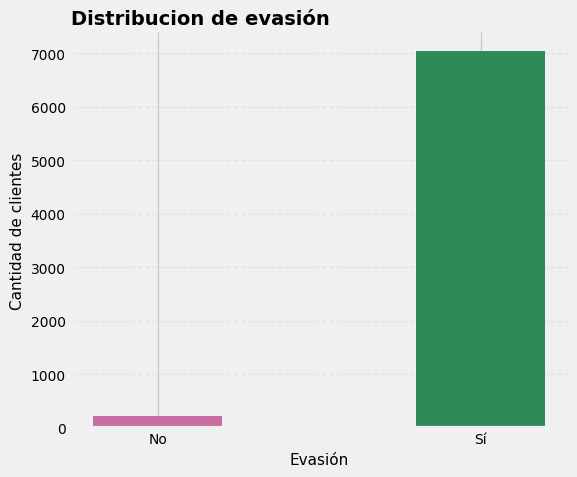

In [52]:
colores=['#2E8B57', '#C76DA2']

fig, ax = plt.subplots(figsize=(6,5))

ax.bar(chrun.index, chrun.values, color=colores, width=0.4)
ax.set_title('Distribucion de evasión', loc='left', fontsize=14, fontweight='bold')
ax.set_xlabel('Evasión', fontsize=11)
ax.set_ylabel('Cantidad de clientes',fontsize=11)
ax.set_xticks(range(len(chrun.index)))
ax.set_xticklabels(['No', 'Sí'],fontsize=10)

# Estilo de ejes
ax.tick_params(axis='y', labelsize=10)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Línea base sutil
ax.yaxis.grid(True, linestyle='--', alpha=0.4)
ax.set_axisbelow(True)

plt.tight_layout()
plt.show()

Recuento de evasión por variables categóricas

Ahora, exploraremos cómo se distribuye la evasión según variables categóricas, como género, tipo de contrato, método de pago, entre otras.

Este análisis puede revelar patrones interesantes, por ejemplo, si los clientes de ciertos perfiles tienen una mayor tendencia a cancelar el servicio, lo que ayudará a orientar acciones estratégica

In [53]:

def churn_por_categoria(df, categoria, target='churn'):
    conteo = (
        df
        .groupby([categoria, target])
        .size()
        .unstack()
        .fillna(0)
    )

    conteo.plot(
        kind='bar',
        figsize=(7, 5),
        width=0.75
    )

    plt.title(
        f'Evasión de clientes según {categoria}',
        loc='left',
        fontsize=14,
        fontweight='bold'
    )
    plt.xlabel(categoria)
    plt.ylabel('Cantidad de clientes')

    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.4)
    plt.tight_layout()
    plt.show()

    return conteo


In [54]:
df.columns

Index(['customerid', 'churn', 'customer_gender', 'customer_seniorcitizen',
       'customer_partner', 'customer_dependents', 'customer_tenure',
       'phone_phoneservice', 'phone_multiplelines', 'internet_internetservice',
       'internet_onlinesecurity', 'internet_onlinebackup',
       'internet_deviceprotection', 'internet_techsupport',
       'internet_streamingtv', 'internet_streamingmovies', 'account_contract',
       'account_paperlessbilling', 'account_paymentmethod',
       'account_charges_monthly', 'account_charges_total', 'daily_accounts'],
      dtype='object')

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerid                 7267 non-null   object 
 1   churn                      7267 non-null   bool   
 2   customer_gender            7267 non-null   object 
 3   customer_seniorcitizen     7267 non-null   bool   
 4   customer_partner           7267 non-null   bool   
 5   customer_dependents        7267 non-null   bool   
 6   customer_tenure            7267 non-null   int64  
 7   phone_phoneservice         7267 non-null   bool   
 8   phone_multiplelines        7267 non-null   bool   
 9   internet_internetservice   7267 non-null   object 
 10  internet_onlinesecurity    7267 non-null   bool   
 11  internet_onlinebackup      7267 non-null   bool   
 12  internet_deviceprotection  7267 non-null   bool   
 13  internet_techsupport       7267 non-null   bool 

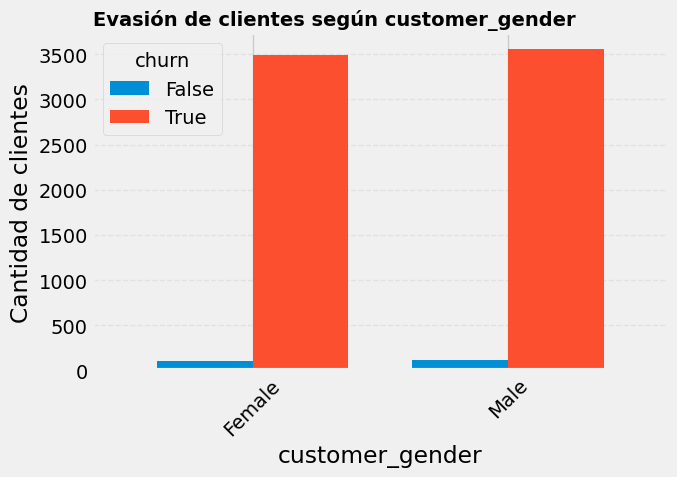

churn,False,True
customer_gender,,
Female,104,3488
Male,120,3555


In [56]:
conteo_genero = churn_por_categoria(df, 'customer_gender')
conteo_genero


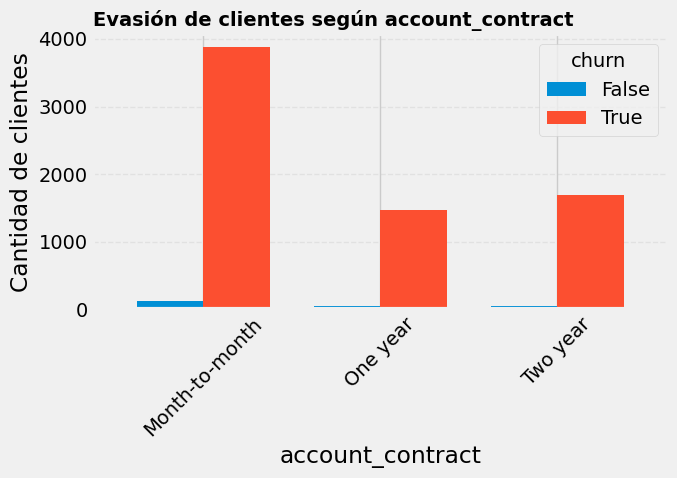

churn,False,True
account_contract,,
Month-to-month,130,3875
One year,46,1473
Two year,48,1695


In [57]:
conteo_contrato = churn_por_categoria(df, 'account_contract')
conteo_contrato

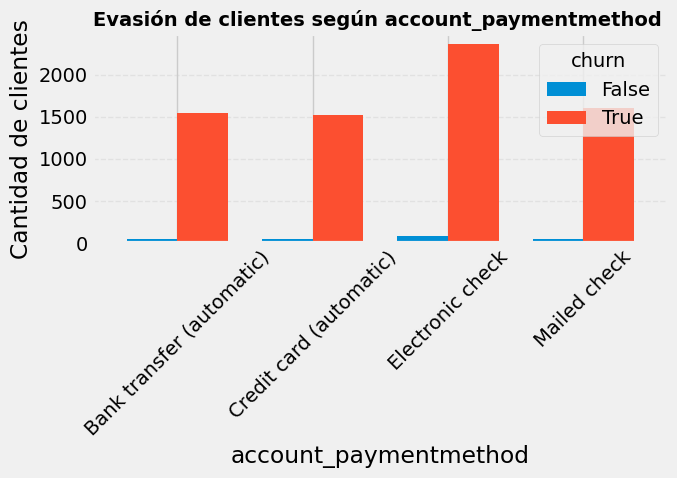

churn,False,True
account_paymentmethod,,
Bank transfer (automatic),45,1544
Credit card (automatic),46,1522
Electronic check,80,2365
Mailed check,53,1612


In [58]:
conteo_pago = churn_por_categoria(df, 'account_paymentmethod')
conteo_pago


In [59]:
df['churn'].value_counts()


,count
churn,
True,7043
False,224


In [60]:


def boxplot_por_churn(df, variable, target='churn'):

    # Normalizar churn a valores consistentes
    churn_map = {
        'No': 'No',
        'Yes': 'Yes',
        0: 'No',
        1: 'Yes',
        False: 'No',
        True: 'Yes'
    }

    temp = df.copy()
    temp[target] = temp[target].map(churn_map)

    data = [
        temp[temp[target] == 'No'][variable].dropna(),
        temp[temp[target] == 'Yes'][variable].dropna()
    ]

    fig, ax = plt.subplots(figsize=(7, 4))

    ax.boxplot(
        data,
        tick_labels=['No evasión', 'Evasión'],
        patch_artist=True
    )

    ax.set_title(
        f'Distribución de {variable} según evasión',
        loc='left',
        fontsize=14,
        fontweight='bold'
    )

    ax.set_ylabel(variable)
    ax.grid(axis='y', linestyle='--', alpha=0.4)
    ax.set_axisbelow(True)

    plt.tight_layout()
    plt.show()


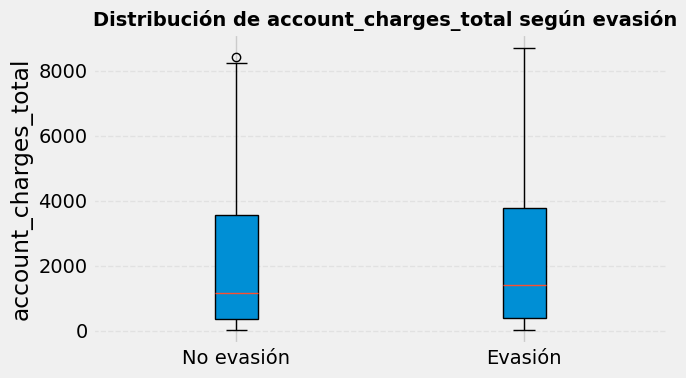

In [61]:
boxplot_por_churn(df, 'account_charges_total')

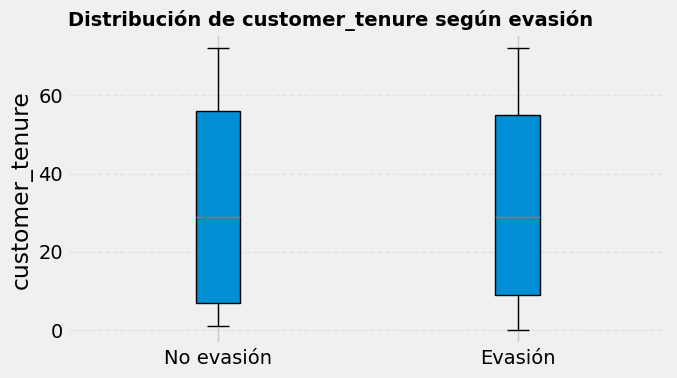

In [62]:
boxplot_por_churn(df, 'customer_tenure')